In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat
from uncertainties import umath
from scipy.optimize import curve_fit

In [2]:
free_fall = pd.read_csv('Styro.csv')
free_fall3_time = free_fall['Run 3:Time(s)']
free_fall3_position = free_fall['Run 3:Position(m)']

free_fall5_time = free_fall['Run 5:Time(s)']
free_fall5_position = free_fall['Run 5:Position(m)']

free_fall7_time = free_fall['Run 7:Time(s)']
free_fall7_position = free_fall['Run 7:Position(m)']

In [3]:
def local_minima_finder(min_time, max_time, time_points, position_points):
    time_indices = []
    for i in time_points:
        if min_time <= i <= max_time:
            time_indices.append(list(time_points).index(i))
    for time_index in np.arange(time_indices[0], time_indices[-1]):
        if position_points[time_index] < position_points[time_index+1] and position_points[time_index] < position_points[time_index-1]:
            minima_time_coord, minima_position_coord = time_points[time_index], position_points[time_index]
    return minima_time_coord, minima_position_coord

In [4]:
def local_maxima_finder(min_time, max_time, time_points, position_points):
    time_indices = []
    for i in time_points:
        if min_time <= i <= max_time:
            time_indices.append(list(time_points).index(i))
    for time_index in np.arange(time_indices[0], time_indices[-1]):
        if position_points[time_index] > position_points[time_index+1] and position_points[time_index] > position_points[time_index-1]:
            minima_time_coord, minima_position_coord = time_points[time_index], position_points[time_index]
    return minima_time_coord, minima_position_coord

# Run 3

In [5]:
positions = []
for i in free_fall3_position:
    if i <0.18:
        positions.append(i)
initial_height = sum(positions)/len(positions)
initial_height

0.1716325227272727

In [6]:
# First bounce height and floor coordinate
floor1 = local_maxima_finder(1.60, 1.95, free_fall3_time, free_fall3_position )
bounce_height1 = local_minima_finder(1.80, 2.05, free_fall3_time, free_fall3_position )

# Second bounce height and floor coordinate
floor2 = local_maxima_finder(1.95, 2.3, free_fall3_time, free_fall3_position )
bounce_height2 = local_minima_finder(2.2, 2.35, free_fall3_time, free_fall3_position )

# Third bounce height and floor coordinate
floor3 = local_maxima_finder(2.3, 2.6, free_fall3_time, free_fall3_position )
bounce_height3 = local_minima_finder(2.5, 2.7, free_fall3_time, free_fall3_position )

# Fourth bounce height and floor coordinate
floor4 = local_maxima_finder(2.6, 2.8, free_fall3_time, free_fall3_position )
bounce_height4 = local_minima_finder(2.70, 2.85, free_fall3_time, free_fall3_position )

print(f'First floor coordinate is at{floor1}')
print(f'First bounce height is at {bounce_height1}')

print(f'Second floor coordinate is at{floor2}')
print(f'Second bounce height is at {bounce_height2}')

print(f'Third floor coordinate is at{floor3}')
print(f'Third bounce height is at {bounce_height3}')

print(f'Fourth floor coordinate is at{floor4}')
print(f'Fourth bounce height is at {bounce_height4}')

First floor coordinate is at(1.75, 0.3651234999999999)
First bounce height is at (1.95, 0.2166045)
Second floor coordinate is at(2.125, 0.3592925)
Second bounce height is at (2.275, 0.2786874999999999)
Third floor coordinate is at(2.425, 0.36701)
Third bounce height is at (2.55, 0.3123015)
Fourth floor coordinate is at(2.675, 0.364952)
Fourth bounce height is at (2.75, 0.333739)


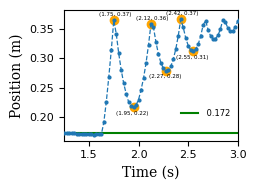

In [7]:
plt.figure(figsize = ((21/2.54)/3.1, ((21/2.54)/3.1)*3/4), facecolor = "white")

plt.scatter(floor1[0], floor1[1], color ='orange', zorder = 2)
plt.annotate(f'({floor1[0]:.2f}, {floor1[1]:.2f})', (floor1[0], floor1[1]), xytext = (floor1[0] + 0.01, floor1[1]+ 0.01), fontsize = 4, ha = 'center', va = 'center')
plt.scatter(bounce_height1[0], bounce_height1[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height1[0]:.2f}, {bounce_height1[1]:.2f})', (bounce_height1[0], bounce_height1[1]), xytext = (bounce_height1[0] - 0.01, bounce_height1[1] - 0.01), fontsize = 4, ha = 'center', va = 'center')

plt.scatter(floor2[0], floor2[1], color ='orange', zorder = 2)
plt.annotate(f'({floor2[0]:.2f}, {floor2[1]:.2f})', (floor2[0], floor2[1]), xytext = (floor2[0] + 0.01, floor2[1]+ 0.01),fontsize = 4, ha = 'center', va = 'center' )
plt.scatter(bounce_height2[0], bounce_height2[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height2[0]:.2f}, {bounce_height2[1]:.2f})', (bounce_height2[0], bounce_height2[1]), xytext = (bounce_height2[0] - 0.01, bounce_height2[1] - 0.01),fontsize = 4, ha = 'center', va = 'center' )

plt.scatter(floor3[0], floor3[1], color ='orange', zorder = 2)
plt.annotate(f'({floor3[0]:.2f}, {floor3[1]:.2f})', (floor3[0], floor3[1]), xytext = (floor3[0] + 0.01, floor3[1]+ 0.01),fontsize = 4, ha = 'center', va = 'center' )
plt.scatter(bounce_height3[0], bounce_height3[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height3[0]:.2f}, {bounce_height3[1]:.2f})', (bounce_height3[0], bounce_height3[1]), xytext = (bounce_height3[0] - 0.01, bounce_height3[1] - 0.01),fontsize = 4, ha = 'center', va = 'center' )
"""
plt.scatter(floor4[0], floor4[1], color ='orange', zorder = 2)
plt.annotate(f'({floor4[0]:.2f}, {floor4[1]:.2f})', (floor4[0], floor4[1]), xytext = (floor4[0] + 0.01, floor4[1]+ 0.01), ha = 'center', va = 'center' )
plt.scatter(bounce_height4[0], bounce_height4[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height4[0]:.2f}, {bounce_height4[1]:.2f})', (bounce_height4[0], bounce_height4[1]), xytext = (bounce_height4[0] - 0.01, bounce_height4[1] - 0.01), ha = 'center', va = 'center' )
"""
plt.plot(free_fall3_time,free_fall3_position, 'o--', lw = 0.9, ms = 2, zorder = 3)
plt.axhline(initial_height, color = 'g', label = f' {initial_height:.3f} ')
plt.xlim(1.25, 3.0)
#plt.ylim(0.15, 0.2)
plt.ylabel('Position (m)', fontsize = 10, fontfamily = 'serif')
plt.xlabel('Time (s)', fontsize = 10, fontfamily = 'serif')
plt.tick_params(axis = 'both', which = 'major',labelsize = 8)
plt.legend(fontsize = 6, loc = 'lower left', bbox_to_anchor=(0.63,0.12),  frameon = False)
plt.tight_layout()
plt.savefig('Run3_Restitution.pdf')
plt.show()

## Coefficient of Restituion for Run 3

$ e  = \displaystyle \sqrt{\frac{h_b}{h_d}}$ where $h_b \equiv$ bounce height and $h_d \equiv$ drop height

In [8]:
mean_floor1 = np.mean([floor1[1], floor2[1], floor3[1]])
mean_floor1

0.36380866666666667

In [9]:
print(f'The coefficient of resititution after the first bounce is {(mean_floor1- bounce_height1[1]) /(mean_floor1 - initial_height)}')
print(f'The coefficient of resititution after the second bounce is {(mean_floor1 - bounce_height2[1]) /(mean_floor1-bounce_height1[1])}')
print(f'The coefficient of restitution after the third bounce is {(mean_floor1 - bounce_height3[1]) /(mean_floor1-bounce_height2[1])}')

The coefficient of resititution after the first bounce is 0.7659856403045011
The coefficient of resititution after the second bounce is 0.5782524271844666
The coefficient of restitution after the third bounce is 0.6051040967092002


In [10]:
positions5 = []
for i in free_fall5_position:
    if i <0.18:
        positions5.append(i)
initial_height5 = sum(positions5)/len(positions5)
initial_height5

0.1724028018867924

# Run 5

In [11]:
# First bounce height and floor coordinate
floor1_5 = local_maxima_finder(1.25, 1.75, free_fall5_time, free_fall5_position )
bounce_height1_5 = local_minima_finder(1.55, 1.9, free_fall5_time, free_fall5_position )

# Second bounce height and floor coordinate
floor2_5 = local_maxima_finder(1.8, 2.2, free_fall5_time, free_fall5_position )
bounce_height2_5 = local_minima_finder(1.95, 2.2, free_fall5_time, free_fall5_position )

# Third bounce height and floor coordinate
floor3_5 = local_maxima_finder(2.2, 2.35, free_fall5_time, free_fall5_position )
bounce_height3_5 = local_minima_finder(2.3, 2.5, free_fall5_time, free_fall5_position )


print(f'First floor coordinate is at{floor1_5}')
print(f'First bounce height is at {bounce_height1_5}')

print(f'Second floor coordinate is at{floor2_5}')
print(f'Second bounce height is at {bounce_height2_5}')

print(f'Third floor coordinate is at{floor3_5}')
print(f'Third bounce height is at {bounce_height3_5}')

First floor coordinate is at(1.55, 0.4964925)
First bounce height is at (1.75, 0.3140164999999999)
Second floor coordinate is at(1.975, 0.4959779999999999)
Second bounce height is at (2.1, 0.4107425)
Third floor coordinate is at(2.275, 0.5067825)
Third bounce height is at (2.375, 0.457562)


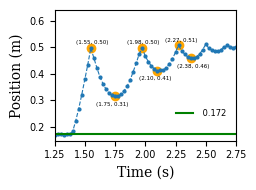

In [12]:
plt.figure(figsize = ((21/2.54)/3.1, ((21/2.54)/3.1)*3/4), facecolor = "white")

plt.scatter(floor1_5[0], floor1_5[1], color ='orange', zorder = 2)
plt.annotate(f'({floor1_5[0]:.2f}, {floor1_5[1]:.2f})', (floor1_5[0], floor1_5[1]), xytext = (floor1_5[0] + 0.01, floor1_5[1]+ 0.02), fontsize = 4,ha = 'center', va = 'center')
plt.scatter(bounce_height1_5[0], bounce_height1_5[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height1_5[0]:.2f}, {bounce_height1_5[1]:.2f})', (bounce_height1_5[0], bounce_height1_5[1]), xytext = (bounce_height1_5[0] - 0.02, bounce_height1_5[1] - 0.03), fontsize = 4,ha = 'center', va = 'center')

plt.scatter(floor2_5[0], floor2_5[1], color ='orange', zorder = 2)
plt.annotate(f'({floor2_5[0]:.2f}, {floor2_5[1]:.2f})', (floor2_5[0], floor2_5[1]), xytext = (floor2_5[0] + 0.01, floor2_5[1]+ 0.02), fontsize = 4,ha = 'center', va = 'center' )
plt.scatter(bounce_height2_5[0], bounce_height2_5[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height2_5[0]:.2f}, {bounce_height2_5[1]:.2f})', (bounce_height2_5[0], bounce_height2_5[1]), xytext = (bounce_height2_5[0] - 0.02, bounce_height2_5[1] - 0.03),fontsize = 4, ha = 'center', va = 'center' )

plt.scatter(floor3_5[0], floor3_5[1], color ='orange', zorder = 2)
plt.annotate(f'({floor3_5[0]:.2f}, {floor3_5[1]:.2f})', (floor3_5[0], floor3_5[1]), xytext = (floor3_5[0] + 0.02, floor3_5[1]+ 0.02), fontsize = 4,ha = 'center', va = 'center' )
plt.scatter(bounce_height3_5[0], bounce_height3_5[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height3_5[0]:.2f}, {bounce_height3_5[1]:.2f})', (bounce_height3_5[0], bounce_height3_5[1]), xytext = (bounce_height3_5[0] +0.02, bounce_height3_5[1] - 0.03),fontsize = 4, ha = 'center', va = 'center' )


plt.plot(free_fall5_time, free_fall5_position, 'o--', lw = 0.8, ms = 2 )
plt.axhline(initial_height5, color = 'g', label = f' {initial_height5:.3f} ')
plt.xlim(1.25, 2.75)
plt.ylabel('Position (m)', fontsize = 10, fontfamily = 'serif')
plt.xlabel('Time (s)', fontsize = 10, fontfamily = 'serif')
plt.tick_params(axis = 'both', which = 'major',labelsize = 7)
plt.legend(fontsize = 6, loc = 'lower left', bbox_to_anchor=(0.63,0.12),  frameon = False)
plt.tight_layout()
plt.savefig('Run5_Restitution.pdf')
plt.show()

# Run 7

In [13]:
positions7 = []
for i in free_fall7_position:
    if i <0.18:
        positions7.append(i)
initial_height7 = sum(positions7)/len(positions7)
initial_height7

0.1709107435897436

In [14]:
# First bounce height and floor coordinate
floor1_7 = local_maxima_finder(2.0, 2.2, free_fall7_time, free_fall7_position )
bounce_height1_7 = [free_fall7_time.iloc[92], free_fall7_position.iloc[92]] #local_minima_finder(2.2, 2.4, free_fall7_time, free_fall7_position )

# Second bounce height and floor coordinate
floor2_7 = local_maxima_finder(2.4, 2.6, free_fall7_time, free_fall7_position )
bounce_height2_7 = local_minima_finder(2.6, 2.8, free_fall7_time, free_fall7_position )

# Third bounce height and floor coordinate
floor3_7 = local_maxima_finder(2.7, 2.95, free_fall7_time, free_fall7_position )
bounce_height3_7 = local_minima_finder(2.9, 3.1, free_fall7_time, free_fall7_position )


print(f'First floor coordinate is at{floor1_7}')
print(f'First bounce height is at {bounce_height1_7}')

print(f'Second floor coordinate is at{floor2_7}')
print(f'Second bounce height is at {bounce_height2_7}')

print(f'Third floor coordinate is at{floor3_7}')
print(f'Third bounce height is at {bounce_height3_7}')

First floor coordinate is at(2.1, 0.47677)
First bounce height is at [2.3, 0.3157315]
Second floor coordinate is at(2.525, 0.5009514999999999)
Second bounce height is at (2.675, 0.3970224999999998)
Third floor coordinate is at(2.85, 0.4934054999999998)
Third bounce height is at (2.95, 0.446243)


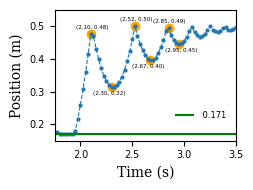

In [15]:
plt.figure(figsize = ((21/2.54)/3.1, ((21/2.54)/3.1)*3/4), facecolor = "white")

plt.scatter(floor1_7[0], floor1_7[1], color ='orange', zorder = 2)
plt.annotate(f'({floor1_7[0]:.2f}, {floor1_7[1]:.2f})', (floor1_7[0], floor1_7[1]), xytext = (floor1_7[0] + 0.01, floor1_7[1]+ 0.02), fontsize = 4, ha = 'center', va = 'center')
plt.scatter(bounce_height1_7[0], bounce_height1_7[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height1_7[0]:.2f}, {bounce_height1_7[1]:.2f})', (bounce_height1_7[0], bounce_height1_7[1]), xytext = (bounce_height1_7[0] - 0.02, bounce_height1_7[1] - 0.02),fontsize = 4, ha = 'center', va = 'center')

plt.scatter(floor2_7[0], floor2_7[1], color ='orange', zorder = 2)
plt.annotate(f'({floor2_7[0]:.2f}, {floor2_7[1]:.2f})', (floor2_7[0], floor2_7[1]), xytext = (floor2_7[0] + 0.01, floor2_7[1]+ 0.02),fontsize = 4, ha = 'center', va = 'center' )
plt.scatter(bounce_height2_7[0], bounce_height2_7[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height2_7[0]:.2f}, {bounce_height2_7[1]:.2f})', (bounce_height2_7[0], bounce_height2_7[1]), xytext = (bounce_height2_7[0] - 0.02, bounce_height2_7[1] - 0.02),fontsize = 4, ha = 'center', va = 'center' )

plt.scatter(floor3_7[0], floor3_7[1], color ='orange', zorder = 2)
plt.annotate(f'({floor3_7[0]:.2f}, {floor3_7[1]:.2f})', (floor3_7[0], floor3_7[1]), xytext = (floor3_7[0] + 0.01, floor3_7[1]+ 0.02), fontsize = 4,ha = 'center', va = 'center' )
plt.scatter(bounce_height3_7[0], bounce_height3_7[1], color ='orange', zorder = 2)
plt.annotate(f'({bounce_height3_7[0]:.2f}, {bounce_height3_7[1]:.2f})', (bounce_height3_7[0], bounce_height3_7[1]), xytext = (bounce_height3_7[0] +0.02, bounce_height3_7[1] - 0.02), fontsize = 4,ha = 'center', va = 'center' )


plt.plot(free_fall7_time, free_fall7_position, 'o--', lw = 0.8, ms = 2)
plt.axhline(initial_height7, color = 'g', label = f' {initial_height7:.3f} ')
plt.xlim(1.75, 3.5)
plt.ylim(0.15, 0.55)
plt.ylabel('Position (m)', fontsize = 10, fontfamily = 'serif')
plt.xlabel('Time (s)', fontsize = 10, fontfamily = 'serif')
plt.tick_params(axis = 'both', which = 'major',labelsize = 7)
plt.legend(fontsize = 6, loc = 'lower left', bbox_to_anchor=(0.63,0.10),  frameon = False)
plt.tight_layout()
plt.savefig('Run7_Restitution.pdf')
plt.show()

In [16]:
print(f'The coefficient of resititution in the first run after the first bounce is {(floor1[1] - bounce_height1[1]) /(floor1[1] - initial_height)}')
print(f'The coefficient of resititution in the first run after the second bounce is {(floor2[1] - bounce_height2[1]) /(floor2[1]-bounce_height1[1])}')
print(f'The coefficient of restitution in the first run after the third bounce is {(floor3[1] - bounce_height3[1]) /(floor3[1]-bounce_height2[1])}')

The coefficient of resititution in the first run after the first bounce is 0.7675758430361385
The coefficient of resititution in the first run after the second bounce is 0.5649038461538468
The coefficient of restitution in the first run after the third bounce is 0.6194174757281546


In [17]:
np.mean([(floor1[1] - bounce_height1[1]) /(floor1[1] - initial_height),(floor2[1] - bounce_height2[1]) /(floor2[1]-bounce_height1[1]) , (floor3[1] - bounce_height3[1]) /(floor3[1]-bounce_height2[1])])

0.6506323883060466

In [18]:
#Energy loss
1 - (0.6506323883060466)**2

0.5766774952871698

In [19]:
print(f'The coefficient of resititution in the fifth run after the first bounce is {(floor1_5[1] - bounce_height1_5[1]) /(floor1_5[1] - initial_height5)}')
print(f'The coefficient of resititution in the fifth run after the second bounce is {(floor2_5[1] - bounce_height2_5[1]) /(floor2_5[1]-bounce_height1_5[1])}')
print(f'The coefficient of restitution in the fifth run after the third bounce is {(floor3_5[1] - bounce_height3_5[1]) /(floor3_5[1]-bounce_height2_5[1])}')

The coefficient of resititution in the fifth run after the first bounce is 0.5630416550181718
The coefficient of resititution in the fifth run after the second bounce is 0.46842601319509847
The coefficient of restitution in the fifth run after the third bounce is 0.5125


In [20]:
print(f'The coefficient of restitution in the seventh run after the first bounce is {(floor1_7[1] - bounce_height1_7[1]) /(floor1_7[1] - initial_height7)}')
print(f'The coefficient of restitution in the seventh run after the second bounce is {(floor2_7[1] - bounce_height2_7[1]) /(floor2_7[1]-bounce_height1_7[1])}')
print(f'The coefficient of restitution in the seventh run after the seventh bounce is {(floor3_7[1] - bounce_height3_7[1]) /(floor3_7[1]-bounce_height2_7[1])}')

The coefficient of restitution in the seventh run after the first bounce is 0.5265117750237226
The coefficient of restitution in the seventh run after the second bounce is 0.561111111111112
The coefficient of restitution in the seventh run after the seventh bounce is 0.48932384341636775
